In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                 NaN         1627           280.0   

   population households  median_income  median_house_value ocean_proximity  \
0       322.0        126         8.3252              452600        NEAR BAY   
1      2401.0       1138         8.3014              358500        NEAR BAY   
2       496.0        177         7.2574              352100        NEAR BAY   
3       558.0        219         5.6431              341300        NEAR BAY   
4         NaN        259         3.8462              342200        NEAR BAY   

   gender  
0    male  
1  female  
2    male  
3  female  
4    male

## Question01: How many rows and columns are in the data?

In [3]:
df.info()

# There are 20640 rows and 11 columns in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


## Question02: How many null values are in each column?

In [4]:
null = df.isna().sum()
null

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

## Question03: What is the column that contains the most null vlues?

In [5]:
null[null == df.isna().sum().sort_values(ascending = False)[0]]

total_bedrooms    4882
dtype: int64

## Question04: What is the avarage number of total rooms and bedrooms?

In [6]:
print(f"The avarage number of total rooms are {df.total_rooms.mean()}")
print(f"The avarage number of total bedrooms are {df.total_bedrooms.mean()}")

The avarage number of total rooms are 2635.7630813953488
The avarage number of total bedrooms are 539.9201040741211


## Question05: What are the different ocean proximity categories that we have?

In [7]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Question06: what is the most frequent ocean proximity?

In [8]:
df["ocean_proximity"].value_counts().nlargest(1)

<1H OCEAN    9136
Name: ocean_proximity, dtype: int64

## Question07: What is the avarage median income overall?

In [9]:
df["median_income"].mean()

3.9394028646562207

## Question08: What is the avarage population for houses in a block where median income is more than $80.0000?

In [10]:
df[df["median_income"] > 8]["population"].mean()

1262.5152905198777

## Question09: What is the maximum and minimum number of total rooms for houses that are located inland

In [11]:
max_rooms= df[df["ocean_proximity"] == "INLAND"]["total_rooms"].max()
min_rooms= df[df["ocean_proximity"] == "INLAND"]["total_rooms"].min()
print(f"The maximum number of total rooms for houses that are located inland is {max_rooms}")
print(f"The minimum number of total rooms for houses that are located inland is {min_rooms}")

The maximum number of total rooms for houses that are located inland is 39320
The minimum number of total rooms for houses that are located inland is 2


## Question10: 
### A) Houses that are located near bay have the highest average median house value
### B) The average housing median age for houses located near ocean is more than hosues located inland

In [12]:
# A) The answer is No
df.groupby("ocean_proximity")["median_house_value"].mean().nlargest(1)

# B) The answer is Yes
df.groupby("ocean_proximity")["housing_median_age"].mean().nlargest(5)

ocean_proximity
ISLAND        42.400000
NEAR BAY      37.666960
NEAR OCEAN    29.365725
<1H OCEAN     29.356692
INLAND        24.243496
Name: housing_median_age, dtype: float64

# Bonus

## 1- Take a look at the columns, which columns do you think is relevant to us?Are there columns that you think will not be needed?

In [13]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                 NaN         1627           280.0   

   population households  median_income  median_house_value ocean_proximity  \
0       322.0        126         8.3252              452600        NEAR BAY   
1      2401.0       1138         8.3014              358500        NEAR BAY   
2       496.0        177         7.2574              352100        NEAR BAY   
3       558.0        219         5.6431              341300        NEAR BAY   
4         NaN        259         3.8462              342200        NEAR BAY   

   gender  
0    male  
1  female  
2    male  
3  female  
4    male

### The columns is relevant to us are: 1-housing_median_age,2- total_bedrooms,3-total_rooms, 4-ocean_proximity, 5-median_house_value, 6-median_income ,7-population

### The columns we don`t need is 1-longitude, 2-latitude,3-households, 4-gender

## Try to explore the data even further on your own:)

In [14]:
fig = px.scatter_mapbox(df,lat="latitude",lon="longitude",center={"lat": 19.43, "lon": -99.13},width=600,height=600,hover_data=["median_house_value"])
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [15]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20382.000000  20640.000000   
mean    -119.569704     35.631861           28.676283   2635.763081   
std        2.003532      2.135952           12.589284   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population  median_income  median_house_value  
count    15758.000000  20596.000000   17873.000000        20640.000000  
mean       539.920104   1424.928724       3.939403       206855.816909  
std        419.834171   1132.237768       1.943517       115395.615874  
min          1.000000      3.000000       0.499900        14999.000000  
25%        296.000000    787.000000       2.598600       119600.000000  
50%        435.000000   1166.000000       3.587100       179700.000000  
75%        652.000000   1725.000000       4.830400       264725.000000  
max       6210.000000  35682.000000      15.000100       500001.000000

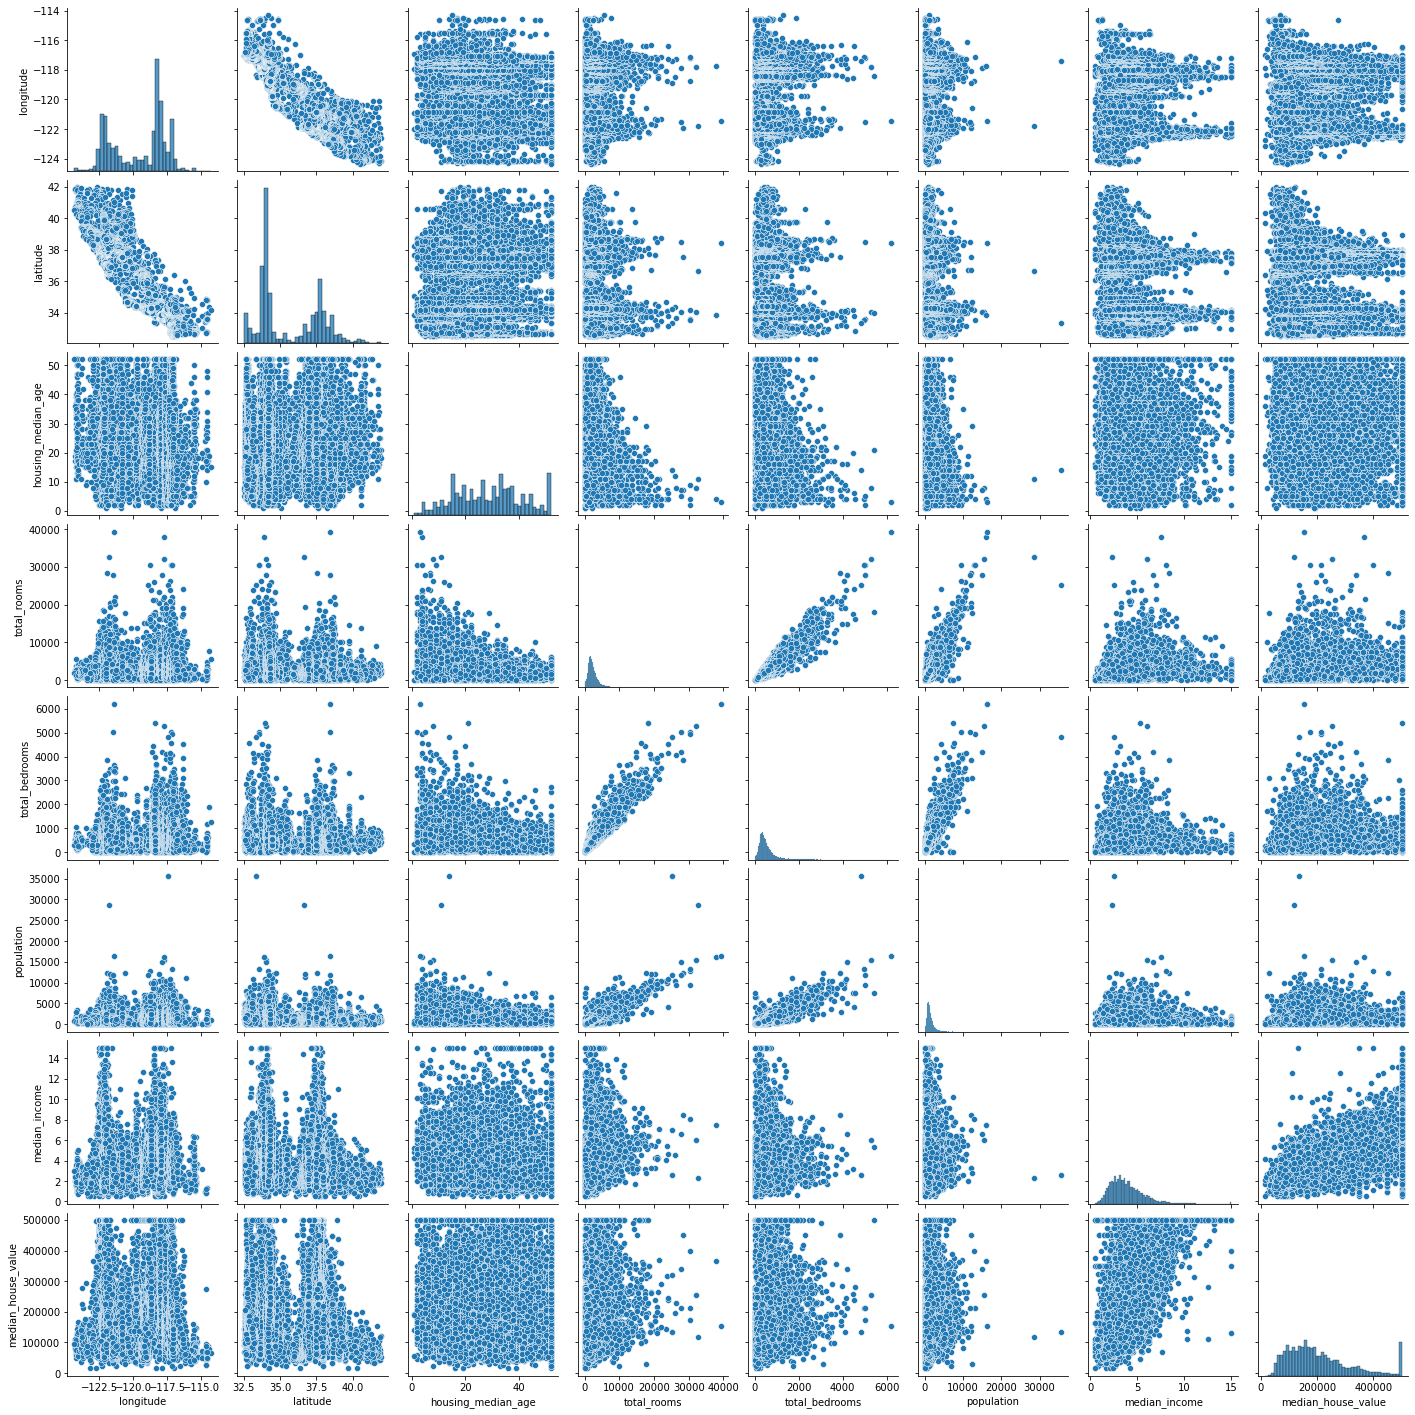

In [16]:
sns.pairplot(df)

In [17]:
df["total_rooms"].corr(df["population"])

0.8569139246656756

In [18]:
df["median_house_value"].corr(df["median_income"])

0.6886245996674842

In [19]:
df["housing_median_age"].corr(df["population"])

-0.294244795791144